In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [42]:
df1=pd.read_csv('Motor DE_AD3291_20240626080128_.csv')
df2=pd.read_csv('Motor DE_AD3291_20240626084430_.csv')
df1=df1[50::50]
df2=df2[50::50]
first=df1[' Horizontal (g) ']
second=df2[' Horizontal (g) ']
first

50      -1.139150
100     -1.986123
150      2.844492
200      1.035703
250     -2.368935
           ...   
31750    0.968711
31800    1.100303
31850   -1.088906
31900   -0.536221
31950   -1.232461
Name:  Horizontal (g) , Length: 639, dtype: float64

In [43]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row=[[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label=df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)

In [44]:
WINDOW_SIZE=35
X,y=df_to_X_y(first,WINDOW_SIZE)

WINDOW_SIZE2=35
X2,y2=df_to_X_y(second,WINDOW_SIZE2)
X2.shape,y2.shape

((604, 35, 1), (604,))

In [45]:
X_train, y_train = X[:], y[:]
#X_val, y_val = X[30000:32000], y[30000:32000]
X_test, y_test = X2[:], y2[:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((604, 35, 1), (604,), (604, 35, 1), (604,))

In [46]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((WINDOW_SIZE, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                16896     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [48]:
model1.fit(X_train, y_train, epochs=200, callbacks=[cp1])

Epoch 1/200
16/19 [========================>.....] - ETA: 0s - loss: 1.5997 - root_mean_squared_error: 1.2648

19/19 [==============================] - 3s 16ms/step - loss: 1.5619 - root_mean_squared_error: 1.2498
Epoch 2/200
19/19 [==============================] - ETA: 0s - loss: 1.4984 - root_mean_squared_error: 1.2241

19/19 [==============================] - 0s 17ms/step - loss: 1.4984 - root_mean_squared_error: 1.2241
Epoch 3/200
16/19 [========================>.....] - ETA: 0s - loss: 1.4144 - root_mean_squared_error: 1.1893

19/19 [==============================] - 0s 16ms/step - loss: 1.4362 - root_mean_squared_error: 1.1984
Epoch 4/200
17/19 [=========================>....] - ETA: 0s - loss: 1.3387 - root_mean_squared_error: 1.1570

19/19 [==============================] - 0s 16ms/step - loss: 1.3392 - root_mean_squared_error: 1.1572
Epoch 5/200
17/19 [=========================>....] - ETA: 0s - loss: 1.3216 - root_mean_squared_error: 1.1496

19/19 [==============================] - 0s 20ms/step - loss: 1.3265 - root_mean_squared_error: 1.1518
Epoch 6/200
17/19 [=========================>....] - ETA: 0s - loss: 1.2322 - root_mean_squared_error: 1.1100

19/19 [==============================] - 0s 16ms/step - loss: 1.2519 - root_mean_squared_error: 1.1189
Epoch 7/200
16/19 [========================>.....] - ETA: 0s - loss: 1.1933 - root_mean_squared_error: 1.0924

19/19 [==============================] - 0s 16ms/step - loss: 1.2123 - root_mean_squared_error: 1.1010
Epoch 8/200
16/19 [========================>.....] - ETA: 0s - loss: 1.1807 - root_mean_squared_error: 1.0866

19/19 [==============================] - 0s 19ms/step - loss: 1.2270 - root_mean_squared_error: 1.1077
Epoch 9/200
17/19 [=========================>....] - ETA: 0s - loss: 1.2339 - root_mean_squared_error: 1.1108

19/19 [==============================] - 0s 16ms/step - loss: 1.2249 - root_mean_squared_error: 1.1068
Epoch 10/200
17/19 [=========================>....] - ETA: 0s - loss: 1.1583 - root_mean_squared_error: 1.0762

19/19 [==============================] - 0s 16ms/step - loss: 1.2109 - root_mean_squared_error: 1.1004
Epoch 11/200
18/19 [===========================>..] - ETA: 0s - loss: 1.2082 - root_mean_squared_error: 1.0992

19/19 [==============================] - 0s 18ms/step - loss: 1.1900 - root_mean_squared_error: 1.0909
Epoch 12/200
16/19 [========================>.....] - ETA: 0s - loss: 1.1495 - root_mean_squared_error: 1.0721

19/19 [==============================] - 0s 16ms/step - loss: 1.1767 - root_mean_squared_error: 1.0847
Epoch 13/200
17/19 [=========================>....] - ETA: 0s - loss: 1.1738 - root_mean_squared_error: 1.0834

19/19 [==============================] - 0s 16ms/step - loss: 1.1700 - root_mean_squared_error: 1.0817
Epoch 14/200
16/19 [========================>.....] - ETA: 0s - loss: 1.0907 - root_mean_squared_error: 1.0444

19/19 [==============================] - 0s 19ms/step - loss: 1.1704 - root_mean_squared_error: 1.0819
Epoch 15/200
18/19 [===========================>..] - ETA: 0s - loss: 1.1796 - root_mean_squared_error: 1.0861

19/19 [==============================] - 0s 17ms/step - loss: 1.1660 - root_mean_squared_error: 1.0798
Epoch 16/200
17/19 [=========================>....] - ETA: 0s - loss: 1.1073 - root_mean_squared_error: 1.0523

19/19 [==============================] - 0s 16ms/step - loss: 1.1436 - root_mean_squared_error: 1.0694
Epoch 17/200
18/19 [===========================>..] - ETA: 0s - loss: 1.1442 - root_mean_squared_error: 1.0697

19/19 [==============================] - 0s 18ms/step - loss: 1.1340 - root_mean_squared_error: 1.0649
Epoch 18/200
19/19 [==============================] - ETA: 0s - loss: 1.1289 - root_mean_squared_error: 1.0625

19/19 [==============================] - 0s 17ms/step - loss: 1.1289 - root_mean_squared_error: 1.0625
Epoch 19/200
16/19 [========================>.....] - ETA: 0s - loss: 1.1476 - root_mean_squared_error: 1.0713

19/19 [==============================] - 0s 16ms/step - loss: 1.1659 - root_mean_squared_error: 1.0798
Epoch 20/200
18/19 [===========================>..] - ETA: 0s - loss: 1.1150 - root_mean_squared_error: 1.0559

19/19 [==============================] - 0s 18ms/step - loss: 1.1252 - root_mean_squared_error: 1.0607
Epoch 21/200
16/19 [========================>.....] - ETA: 0s - loss: 1.0815 - root_mean_squared_error: 1.0400

19/19 [==============================] - 0s 16ms/step - loss: 1.1096 - root_mean_squared_error: 1.0534
Epoch 22/200
16/19 [========================>.....] - ETA: 0s - loss: 1.1132 - root_mean_squared_error: 1.0551

19/19 [==============================] - 0s 17ms/step - loss: 1.1043 - root_mean_squared_error: 1.0508
Epoch 23/200
19/19 [==============================] - ETA: 0s - loss: 1.1180 - root_mean_squared_error: 1.0574

19/19 [==============================] - 0s 20ms/step - loss: 1.1180 - root_mean_squared_error: 1.0574
Epoch 24/200
19/19 [==============================] - ETA: 0s - loss: 1.1099 - root_mean_squared_error: 1.0535

19/19 [==============================] - 1s 31ms/step - loss: 1.1099 - root_mean_squared_error: 1.0535
Epoch 25/200
19/19 [==============================] - ETA: 0s - loss: 1.1170 - root_mean_squared_error: 1.0569

19/19 [==============================] - 1s 32ms/step - loss: 1.1170 - root_mean_squared_error: 1.0569
Epoch 26/200
19/19 [==============================] - ETA: 0s - loss: 1.0782 - root_mean_squared_error: 1.0384

19/19 [==============================] - 1s 34ms/step - loss: 1.0782 - root_mean_squared_error: 1.0384
Epoch 27/200
19/19 [==============================] - ETA: 0s - loss: 1.0941 - root_mean_squared_error: 1.0460

19/19 [==============================] - 1s 32ms/step - loss: 1.0941 - root_mean_squared_error: 1.0460
Epoch 28/200
19/19 [==============================] - ETA: 0s - loss: 1.0728 - root_mean_squared_error: 1.0357

19/19 [==============================] - 1s 35ms/step - loss: 1.0728 - root_mean_squared_error: 1.0357
Epoch 29/200
19/19 [==============================] - ETA: 0s - loss: 1.0777 - root_mean_squared_error: 1.0381

19/19 [==============================] - 1s 32ms/step - loss: 1.0777 - root_mean_squared_error: 1.0381
Epoch 30/200
19/19 [==============================] - ETA: 0s - loss: 1.0950 - root_mean_squared_error: 1.0464

19/19 [==============================] - 1s 31ms/step - loss: 1.0950 - root_mean_squared_error: 1.0464
Epoch 31/200
19/19 [==============================] - ETA: 0s - loss: 1.0889 - root_mean_squared_error: 1.0435

19/19 [==============================] - 1s 34ms/step - loss: 1.0889 - root_mean_squared_error: 1.0435
Epoch 32/200
19/19 [==============================] - ETA: 0s - loss: 1.0782 - root_mean_squared_error: 1.0384

19/19 [==============================] - 1s 33ms/step - loss: 1.0782 - root_mean_squared_error: 1.0384
Epoch 33/200
17/19 [=========================>....] - ETA: 0s - loss: 1.0616 - root_mean_squared_error: 1.0303

19/19 [==============================] - 1s 31ms/step - loss: 1.0552 - root_mean_squared_error: 1.0272
Epoch 34/200
16/19 [========================>.....] - ETA: 0s - loss: 1.0346 - root_mean_squared_error: 1.0171

19/19 [==============================] - 0s 16ms/step - loss: 1.0587 - root_mean_squared_error: 1.0289
Epoch 35/200
17/19 [=========================>....] - ETA: 0s - loss: 1.0609 - root_mean_squared_error: 1.0300

19/19 [==============================] - 0s 18ms/step - loss: 1.0519 - root_mean_squared_error: 1.0256
Epoch 36/200
18/19 [===========================>..] - ETA: 0s - loss: 1.0453 - root_mean_squared_error: 1.0224

19/19 [==============================] - 0s 17ms/step - loss: 1.0461 - root_mean_squared_error: 1.0228
Epoch 37/200
17/19 [=========================>....] - ETA: 0s - loss: 1.0000 - root_mean_squared_error: 1.0000

19/19 [==============================] - 0s 16ms/step - loss: 1.0224 - root_mean_squared_error: 1.0111
Epoch 38/200
17/19 [=========================>....] - ETA: 0s - loss: 1.0325 - root_mean_squared_error: 1.0161

19/19 [==============================] - 0s 19ms/step - loss: 1.0344 - root_mean_squared_error: 1.0170
Epoch 39/200
16/19 [========================>.....] - ETA: 0s - loss: 1.0546 - root_mean_squared_error: 1.0269

19/19 [==============================] - 0s 16ms/step - loss: 1.0216 - root_mean_squared_error: 1.0107
Epoch 40/200
16/19 [========================>.....] - ETA: 0s - loss: 1.0133 - root_mean_squared_error: 1.0066

19/19 [==============================] - 0s 16ms/step - loss: 1.0145 - root_mean_squared_error: 1.0072
Epoch 41/200
17/19 [=========================>....] - ETA: 0s - loss: 0.9446 - root_mean_squared_error: 0.9719

19/19 [==============================] - 0s 19ms/step - loss: 0.9984 - root_mean_squared_error: 0.9992
Epoch 42/200
16/19 [========================>.....] - ETA: 0s - loss: 1.0092 - root_mean_squared_error: 1.0046

19/19 [==============================] - 0s 16ms/step - loss: 0.9989 - root_mean_squared_error: 0.9994
Epoch 43/200
17/19 [=========================>....] - ETA: 0s - loss: 0.9951 - root_mean_squared_error: 0.9976

19/19 [==============================] - 0s 16ms/step - loss: 0.9868 - root_mean_squared_error: 0.9934
Epoch 44/200
18/19 [===========================>..] - ETA: 0s - loss: 0.9779 - root_mean_squared_error: 0.9889

19/19 [==============================] - 0s 19ms/step - loss: 0.9689 - root_mean_squared_error: 0.9844
Epoch 45/200
18/19 [===========================>..] - ETA: 0s - loss: 0.9679 - root_mean_squared_error: 0.9838

19/19 [==============================] - 0s 18ms/step - loss: 0.9642 - root_mean_squared_error: 0.9819
Epoch 46/200
17/19 [=========================>....] - ETA: 0s - loss: 0.9599 - root_mean_squared_error: 0.9797

19/19 [==============================] - 0s 16ms/step - loss: 0.9762 - root_mean_squared_error: 0.9880
Epoch 47/200
17/19 [=========================>....] - ETA: 0s - loss: 0.9391 - root_mean_squared_error: 0.9691

19/19 [==============================] - 0s 20ms/step - loss: 0.9498 - root_mean_squared_error: 0.9746
Epoch 48/200
18/19 [===========================>..] - ETA: 0s - loss: 0.9555 - root_mean_squared_error: 0.9775

19/19 [==============================] - 0s 17ms/step - loss: 0.9470 - root_mean_squared_error: 0.9731
Epoch 49/200
16/19 [========================>.....] - ETA: 0s - loss: 0.9254 - root_mean_squared_error: 0.9620

19/19 [==============================] - 0s 17ms/step - loss: 0.9498 - root_mean_squared_error: 0.9746
Epoch 50/200
19/19 [==============================] - ETA: 0s - loss: 0.9452 - root_mean_squared_error: 0.9722

19/19 [==============================] - 0s 20ms/step - loss: 0.9452 - root_mean_squared_error: 0.9722
Epoch 51/200
19/19 [==============================] - ETA: 0s - loss: 0.9043 - root_mean_squared_error: 0.9510

19/19 [==============================] - 0s 19ms/step - loss: 0.9043 - root_mean_squared_error: 0.9510
Epoch 52/200
18/19 [===========================>..] - ETA: 0s - loss: 0.8973 - root_mean_squared_error: 0.9472

19/19 [==============================] - 0s 17ms/step - loss: 0.8953 - root_mean_squared_error: 0.9462
Epoch 53/200
18/19 [===========================>..] - ETA: 0s - loss: 0.8654 - root_mean_squared_error: 0.9303

19/19 [==============================] - 0s 20ms/step - loss: 0.8641 - root_mean_squared_error: 0.9296
Epoch 54/200
17/19 [=========================>....] - ETA: 0s - loss: 0.9007 - root_mean_squared_error: 0.9491

19/19 [==============================] - 0s 17ms/step - loss: 0.8911 - root_mean_squared_error: 0.9440
Epoch 55/200
17/19 [=========================>....] - ETA: 0s - loss: 0.9047 - root_mean_squared_error: 0.9511

19/19 [==============================] - 0s 18ms/step - loss: 0.8961 - root_mean_squared_error: 0.9466
Epoch 56/200
17/19 [=========================>....] - ETA: 0s - loss: 0.8373 - root_mean_squared_error: 0.9150

19/19 [==============================] - 0s 19ms/step - loss: 0.8531 - root_mean_squared_error: 0.9236
Epoch 57/200
19/19 [==============================] - ETA: 0s - loss: 0.8567 - root_mean_squared_error: 0.9256

19/19 [==============================] - 0s 17ms/step - loss: 0.8567 - root_mean_squared_error: 0.9256
Epoch 58/200
17/19 [=========================>....] - ETA: 0s - loss: 0.8551 - root_mean_squared_error: 0.9247

19/19 [==============================] - 0s 19ms/step - loss: 0.8481 - root_mean_squared_error: 0.9209
Epoch 59/200
18/19 [===========================>..] - ETA: 0s - loss: 0.8354 - root_mean_squared_error: 0.9140

19/19 [==============================] - 0s 18ms/step - loss: 0.8368 - root_mean_squared_error: 0.9148
Epoch 60/200
16/19 [========================>.....] - ETA: 0s - loss: 0.8392 - root_mean_squared_error: 0.9161

19/19 [==============================] - 0s 17ms/step - loss: 0.8096 - root_mean_squared_error: 0.8998
Epoch 61/200
18/19 [===========================>..] - ETA: 0s - loss: 0.7959 - root_mean_squared_error: 0.8921

19/19 [==============================] - 0s 18ms/step - loss: 0.7925 - root_mean_squared_error: 0.8902
Epoch 62/200
18/19 [===========================>..] - ETA: 0s - loss: 0.7601 - root_mean_squared_error: 0.8718

19/19 [==============================] - 0s 25ms/step - loss: 0.7653 - root_mean_squared_error: 0.8748
Epoch 63/200
19/19 [==============================] - ETA: 0s - loss: 0.7460 - root_mean_squared_error: 0.8637

19/19 [==============================] - 1s 28ms/step - loss: 0.7460 - root_mean_squared_error: 0.8637
Epoch 64/200
19/19 [==============================] - ETA: 0s - loss: 0.7293 - root_mean_squared_error: 0.8540

19/19 [==============================] - 1s 29ms/step - loss: 0.7293 - root_mean_squared_error: 0.8540
Epoch 65/200
19/19 [==============================] - ETA: 0s - loss: 0.7325 - root_mean_squared_error: 0.8559

19/19 [==============================] - 1s 32ms/step - loss: 0.7325 - root_mean_squared_error: 0.8559
Epoch 66/200
19/19 [==============================] - ETA: 0s - loss: 0.7353 - root_mean_squared_error: 0.8575

19/19 [==============================] - 1s 31ms/step - loss: 0.7353 - root_mean_squared_error: 0.8575
Epoch 67/200
19/19 [==============================] - ETA: 0s - loss: 0.7010 - root_mean_squared_error: 0.8373

19/19 [==============================] - 1s 30ms/step - loss: 0.7010 - root_mean_squared_error: 0.8373
Epoch 68/200
17/19 [=========================>....] - ETA: 0s - loss: 0.7070 - root_mean_squared_error: 0.8409

19/19 [==============================] - 1s 27ms/step - loss: 0.6968 - root_mean_squared_error: 0.8348
Epoch 69/200
18/19 [===========================>..] - ETA: 0s - loss: 0.6753 - root_mean_squared_error: 0.8218

19/19 [==============================] - 0s 18ms/step - loss: 0.6766 - root_mean_squared_error: 0.8226
Epoch 70/200
19/19 [==============================] - ETA: 0s - loss: 0.6971 - root_mean_squared_error: 0.8349

19/19 [==============================] - 0s 17ms/step - loss: 0.6971 - root_mean_squared_error: 0.8349
Epoch 71/200
19/19 [==============================] - ETA: 0s - loss: 0.6507 - root_mean_squared_error: 0.8067

19/19 [==============================] - 0s 17ms/step - loss: 0.6507 - root_mean_squared_error: 0.8067
Epoch 72/200
19/19 [==============================] - ETA: 0s - loss: 0.6920 - root_mean_squared_error: 0.8319

19/19 [==============================] - 0s 18ms/step - loss: 0.6920 - root_mean_squared_error: 0.8319
Epoch 73/200
19/19 [==============================] - ETA: 0s - loss: 0.6505 - root_mean_squared_error: 0.8065

19/19 [==============================] - 0s 17ms/step - loss: 0.6505 - root_mean_squared_error: 0.8065
Epoch 74/200
19/19 [==============================] - ETA: 0s - loss: 0.6296 - root_mean_squared_error: 0.7935

19/19 [==============================] - 0s 18ms/step - loss: 0.6296 - root_mean_squared_error: 0.7935
Epoch 75/200
19/19 [==============================] - ETA: 0s - loss: 0.6495 - root_mean_squared_error: 0.8059

19/19 [==============================] - 0s 19ms/step - loss: 0.6495 - root_mean_squared_error: 0.8059
Epoch 76/200
16/19 [========================>.....] - ETA: 0s - loss: 0.6145 - root_mean_squared_error: 0.7839

19/19 [==============================] - 0s 17ms/step - loss: 0.6346 - root_mean_squared_error: 0.7966
Epoch 77/200
17/19 [=========================>....] - ETA: 0s - loss: 0.5879 - root_mean_squared_error: 0.7668

19/19 [==============================] - 0s 19ms/step - loss: 0.5892 - root_mean_squared_error: 0.7676
Epoch 78/200
18/19 [===========================>..] - ETA: 0s - loss: 0.6445 - root_mean_squared_error: 0.8028

19/19 [==============================] - 0s 17ms/step - loss: 0.6439 - root_mean_squared_error: 0.8024
Epoch 79/200
19/19 [==============================] - ETA: 0s - loss: 0.5918 - root_mean_squared_error: 0.7693

19/19 [==============================] - 0s 17ms/step - loss: 0.5918 - root_mean_squared_error: 0.7693
Epoch 80/200
18/19 [===========================>..] - ETA: 0s - loss: 0.5965 - root_mean_squared_error: 0.7723

19/19 [==============================] - 0s 19ms/step - loss: 0.5874 - root_mean_squared_error: 0.7664
Epoch 81/200
19/19 [==============================] - ETA: 0s - loss: 0.5473 - root_mean_squared_error: 0.7398

19/19 [==============================] - 0s 17ms/step - loss: 0.5473 - root_mean_squared_error: 0.7398
Epoch 82/200
19/19 [==============================] - ETA: 0s - loss: 0.5305 - root_mean_squared_error: 0.7283

19/19 [==============================] - 0s 18ms/step - loss: 0.5305 - root_mean_squared_error: 0.7283
Epoch 83/200
17/19 [=========================>....] - ETA: 0s - loss: 0.5238 - root_mean_squared_error: 0.7237

19/19 [==============================] - 0s 18ms/step - loss: 0.5258 - root_mean_squared_error: 0.7251
Epoch 84/200
19/19 [==============================] - ETA: 0s - loss: 0.5060 - root_mean_squared_error: 0.7113

19/19 [==============================] - 0s 17ms/step - loss: 0.5060 - root_mean_squared_error: 0.7113
Epoch 85/200
18/19 [===========================>..] - ETA: 0s - loss: 0.5078 - root_mean_squared_error: 0.7126

19/19 [==============================] - 0s 18ms/step - loss: 0.5313 - root_mean_squared_error: 0.7289
Epoch 86/200
17/19 [=========================>....] - ETA: 0s - loss: 0.5049 - root_mean_squared_error: 0.7106

19/19 [==============================] - 0s 19ms/step - loss: 0.4940 - root_mean_squared_error: 0.7028
Epoch 87/200
19/19 [==============================] - ETA: 0s - loss: 0.4855 - root_mean_squared_error: 0.6968

19/19 [==============================] - 0s 17ms/step - loss: 0.4855 - root_mean_squared_error: 0.6968
Epoch 88/200
18/19 [===========================>..] - ETA: 0s - loss: 0.4924 - root_mean_squared_error: 0.7017

19/19 [==============================] - 0s 18ms/step - loss: 0.4896 - root_mean_squared_error: 0.6997
Epoch 89/200
18/19 [===========================>..] - ETA: 0s - loss: 0.4869 - root_mean_squared_error: 0.6977

19/19 [==============================] - 0s 18ms/step - loss: 0.4926 - root_mean_squared_error: 0.7019
Epoch 90/200
17/19 [=========================>....] - ETA: 0s - loss: 0.4790 - root_mean_squared_error: 0.6921

19/19 [==============================] - 0s 17ms/step - loss: 0.4942 - root_mean_squared_error: 0.7030
Epoch 91/200
18/19 [===========================>..] - ETA: 0s - loss: 0.4427 - root_mean_squared_error: 0.6654

19/19 [==============================] - 0s 18ms/step - loss: 0.4408 - root_mean_squared_error: 0.6639
Epoch 92/200
17/19 [=========================>....] - ETA: 0s - loss: 0.4048 - root_mean_squared_error: 0.6362

19/19 [==============================] - 0s 19ms/step - loss: 0.4077 - root_mean_squared_error: 0.6385
Epoch 93/200
16/19 [========================>.....] - ETA: 0s - loss: 0.3843 - root_mean_squared_error: 0.6199

19/19 [==============================] - 0s 16ms/step - loss: 0.3875 - root_mean_squared_error: 0.6225
Epoch 94/200
18/19 [===========================>..] - ETA: 0s - loss: 0.3985 - root_mean_squared_error: 0.6312

19/19 [==============================] - 0s 18ms/step - loss: 0.4016 - root_mean_squared_error: 0.6338
Epoch 95/200
18/19 [===========================>..] - ETA: 0s - loss: 0.4188 - root_mean_squared_error: 0.6472

19/19 [==============================] - 0s 17ms/step - loss: 0.4133 - root_mean_squared_error: 0.6429
Epoch 96/200
16/19 [========================>.....] - ETA: 0s - loss: 0.4103 - root_mean_squared_error: 0.6406

19/19 [==============================] - 0s 16ms/step - loss: 0.3862 - root_mean_squared_error: 0.6215
Epoch 97/200
19/19 [==============================] - ETA: 0s - loss: 0.3689 - root_mean_squared_error: 0.6074

19/19 [==============================] - 0s 20ms/step - loss: 0.3689 - root_mean_squared_error: 0.6074
Epoch 98/200
18/19 [===========================>..] - ETA: 0s - loss: 0.3690 - root_mean_squared_error: 0.6075

19/19 [==============================] - 1s 27ms/step - loss: 0.3621 - root_mean_squared_error: 0.6017
Epoch 99/200
18/19 [===========================>..] - ETA: 0s - loss: 0.3556 - root_mean_squared_error: 0.5963

19/19 [==============================] - 1s 28ms/step - loss: 0.3575 - root_mean_squared_error: 0.5979
Epoch 100/200
18/19 [===========================>..] - ETA: 0s - loss: 0.3566 - root_mean_squared_error: 0.5972

19/19 [==============================] - 1s 27ms/step - loss: 0.3607 - root_mean_squared_error: 0.6006
Epoch 101/200
19/19 [==============================] - ETA: 0s - loss: 0.3608 - root_mean_squared_error: 0.6007

19/19 [==============================] - 1s 29ms/step - loss: 0.3608 - root_mean_squared_error: 0.6007
Epoch 102/200
19/19 [==============================] - ETA: 0s - loss: 0.3842 - root_mean_squared_error: 0.6198

19/19 [==============================] - 1s 27ms/step - loss: 0.3842 - root_mean_squared_error: 0.6198
Epoch 103/200
19/19 [==============================] - ETA: 0s - loss: 0.3297 - root_mean_squared_error: 0.5742

19/19 [==============================] - 1s 29ms/step - loss: 0.3297 - root_mean_squared_error: 0.5742
Epoch 104/200
19/19 [==============================] - ETA: 0s - loss: 0.3194 - root_mean_squared_error: 0.5652

19/19 [==============================] - 0s 23ms/step - loss: 0.3194 - root_mean_squared_error: 0.5652
Epoch 105/200
18/19 [===========================>..] - ETA: 0s - loss: 0.2991 - root_mean_squared_error: 0.5469

19/19 [==============================] - 0s 20ms/step - loss: 0.3005 - root_mean_squared_error: 0.5482
Epoch 106/200
17/19 [=========================>....] - ETA: 0s - loss: 0.3242 - root_mean_squared_error: 0.5694

19/19 [==============================] - 0s 17ms/step - loss: 0.3110 - root_mean_squared_error: 0.5577
Epoch 107/200
19/19 [==============================] - ETA: 0s - loss: 0.3004 - root_mean_squared_error: 0.5481

19/19 [==============================] - 0s 17ms/step - loss: 0.3004 - root_mean_squared_error: 0.5481
Epoch 108/200
17/19 [=========================>....] - ETA: 0s - loss: 0.3175 - root_mean_squared_error: 0.5635

19/19 [==============================] - 0s 19ms/step - loss: 0.3104 - root_mean_squared_error: 0.5571
Epoch 109/200
18/19 [===========================>..] - ETA: 0s - loss: 0.3161 - root_mean_squared_error: 0.5622

19/19 [==============================] - 0s 17ms/step - loss: 0.3166 - root_mean_squared_error: 0.5627
Epoch 110/200
16/19 [========================>.....] - ETA: 0s - loss: 0.3013 - root_mean_squared_error: 0.5489

19/19 [==============================] - 0s 16ms/step - loss: 0.2872 - root_mean_squared_error: 0.5359
Epoch 111/200
17/19 [=========================>....] - ETA: 0s - loss: 0.2468 - root_mean_squared_error: 0.4968

19/19 [==============================] - 0s 20ms/step - loss: 0.2627 - root_mean_squared_error: 0.5125
Epoch 112/200
16/19 [========================>.....] - ETA: 0s - loss: 0.2621 - root_mean_squared_error: 0.5119

19/19 [==============================] - 0s 17ms/step - loss: 0.2822 - root_mean_squared_error: 0.5313
Epoch 113/200
18/19 [===========================>..] - ETA: 0s - loss: 0.2351 - root_mean_squared_error: 0.4849

19/19 [==============================] - 0s 17ms/step - loss: 0.2459 - root_mean_squared_error: 0.4959
Epoch 114/200
16/19 [========================>.....] - ETA: 0s - loss: 0.2373 - root_mean_squared_error: 0.4871

19/19 [==============================] - 0s 19ms/step - loss: 0.2417 - root_mean_squared_error: 0.4916
Epoch 115/200
18/19 [===========================>..] - ETA: 0s - loss: 0.2225 - root_mean_squared_error: 0.4717

19/19 [==============================] - 0s 17ms/step - loss: 0.2185 - root_mean_squared_error: 0.4674
Epoch 116/200
19/19 [==============================] - ETA: 0s - loss: 0.2249 - root_mean_squared_error: 0.4742

19/19 [==============================] - 0s 17ms/step - loss: 0.2249 - root_mean_squared_error: 0.4742
Epoch 117/200
16/19 [========================>.....] - ETA: 0s - loss: 0.2279 - root_mean_squared_error: 0.4774

19/19 [==============================] - 0s 19ms/step - loss: 0.2232 - root_mean_squared_error: 0.4724
Epoch 118/200
19/19 [==============================] - ETA: 0s - loss: 0.2293 - root_mean_squared_error: 0.4788

19/19 [==============================] - 0s 17ms/step - loss: 0.2293 - root_mean_squared_error: 0.4788
Epoch 119/200
18/19 [===========================>..] - ETA: 0s - loss: 0.2121 - root_mean_squared_error: 0.4606

19/19 [==============================] - 0s 17ms/step - loss: 0.2107 - root_mean_squared_error: 0.4591
Epoch 120/200
17/19 [=========================>....] - ETA: 0s - loss: 0.1756 - root_mean_squared_error: 0.4191

19/19 [==============================] - 0s 20ms/step - loss: 0.1850 - root_mean_squared_error: 0.4301
Epoch 121/200
17/19 [=========================>....] - ETA: 0s - loss: 0.1778 - root_mean_squared_error: 0.4217

19/19 [==============================] - 0s 18ms/step - loss: 0.1757 - root_mean_squared_error: 0.4192
Epoch 122/200
18/19 [===========================>..] - ETA: 0s - loss: 0.1740 - root_mean_squared_error: 0.4171

19/19 [==============================] - 0s 17ms/step - loss: 0.1782 - root_mean_squared_error: 0.4221
Epoch 123/200
18/19 [===========================>..] - ETA: 0s - loss: 0.1940 - root_mean_squared_error: 0.4404

19/19 [==============================] - 0s 18ms/step - loss: 0.1968 - root_mean_squared_error: 0.4436
Epoch 124/200
16/19 [========================>.....] - ETA: 0s - loss: 0.1791 - root_mean_squared_error: 0.4232

19/19 [==============================] - 0s 16ms/step - loss: 0.1788 - root_mean_squared_error: 0.4229
Epoch 125/200
19/19 [==============================] - ETA: 0s - loss: 0.1700 - root_mean_squared_error: 0.4123

19/19 [==============================] - 0s 19ms/step - loss: 0.1700 - root_mean_squared_error: 0.4123
Epoch 126/200
17/19 [=========================>....] - ETA: 0s - loss: 0.1486 - root_mean_squared_error: 0.3855

19/19 [==============================] - 0s 19ms/step - loss: 0.1492 - root_mean_squared_error: 0.3863
Epoch 127/200
17/19 [=========================>....] - ETA: 0s - loss: 0.1626 - root_mean_squared_error: 0.4033

19/19 [==============================] - 0s 16ms/step - loss: 0.1645 - root_mean_squared_error: 0.4056
Epoch 128/200
17/19 [=========================>....] - ETA: 0s - loss: 0.1692 - root_mean_squared_error: 0.4113

19/19 [==============================] - 0s 18ms/step - loss: 0.1703 - root_mean_squared_error: 0.4127
Epoch 129/200
19/19 [==============================] - ETA: 0s - loss: 0.1663 - root_mean_squared_error: 0.4078

19/19 [==============================] - 0s 19ms/step - loss: 0.1663 - root_mean_squared_error: 0.4078
Epoch 130/200
19/19 [==============================] - ETA: 0s - loss: 0.1446 - root_mean_squared_error: 0.3803

19/19 [==============================] - 0s 17ms/step - loss: 0.1446 - root_mean_squared_error: 0.3803
Epoch 131/200
18/19 [===========================>..] - ETA: 0s - loss: 0.1305 - root_mean_squared_error: 0.3612

19/19 [==============================] - 0s 18ms/step - loss: 0.1367 - root_mean_squared_error: 0.3698
Epoch 132/200
17/19 [=========================>....] - ETA: 0s - loss: 0.1150 - root_mean_squared_error: 0.3392

19/19 [==============================] - 0s 18ms/step - loss: 0.1153 - root_mean_squared_error: 0.3396
Epoch 133/200
18/19 [===========================>..] - ETA: 0s - loss: 0.1305 - root_mean_squared_error: 0.3612

19/19 [==============================] - 0s 27ms/step - loss: 0.1289 - root_mean_squared_error: 0.3590
Epoch 134/200
19/19 [==============================] - ETA: 0s - loss: 0.1301 - root_mean_squared_error: 0.3607

19/19 [==============================] - 1s 29ms/step - loss: 0.1301 - root_mean_squared_error: 0.3607
Epoch 135/200
19/19 [==============================] - ETA: 0s - loss: 0.1084 - root_mean_squared_error: 0.3293

19/19 [==============================] - 1s 27ms/step - loss: 0.1084 - root_mean_squared_error: 0.3293
Epoch 136/200
19/19 [==============================] - ETA: 0s - loss: 0.1090 - root_mean_squared_error: 0.3302

19/19 [==============================] - 1s 29ms/step - loss: 0.1090 - root_mean_squared_error: 0.3302
Epoch 137/200
19/19 [==============================] - ETA: 0s - loss: 0.1131 - root_mean_squared_error: 0.3363

19/19 [==============================] - 1s 30ms/step - loss: 0.1131 - root_mean_squared_error: 0.3363
Epoch 138/200
19/19 [==============================] - ETA: 0s - loss: 0.1218 - root_mean_squared_error: 0.3490

19/19 [==============================] - 1s 30ms/step - loss: 0.1218 - root_mean_squared_error: 0.3490
Epoch 139/200
16/19 [========================>.....] - ETA: 0s - loss: 0.1050 - root_mean_squared_error: 0.3240

19/19 [==============================] - 0s 26ms/step - loss: 0.1068 - root_mean_squared_error: 0.3269
Epoch 140/200
17/19 [=========================>....] - ETA: 0s - loss: 0.0945 - root_mean_squared_error: 0.3074

19/19 [==============================] - 0s 18ms/step - loss: 0.1006 - root_mean_squared_error: 0.3171
Epoch 141/200
17/19 [=========================>....] - ETA: 0s - loss: 0.0943 - root_mean_squared_error: 0.3072

19/19 [==============================] - 0s 19ms/step - loss: 0.0948 - root_mean_squared_error: 0.3079
Epoch 142/200
16/19 [========================>.....] - ETA: 0s - loss: 0.1041 - root_mean_squared_error: 0.3227

19/19 [==============================] - 0s 19ms/step - loss: 0.0998 - root_mean_squared_error: 0.3159
Epoch 143/200
19/19 [==============================] - ETA: 0s - loss: 0.0881 - root_mean_squared_error: 0.2968

19/19 [==============================] - 0s 19ms/step - loss: 0.0881 - root_mean_squared_error: 0.2968
Epoch 144/200
18/19 [===========================>..] - ETA: 0s - loss: 0.0828 - root_mean_squared_error: 0.2877

19/19 [==============================] - 0s 18ms/step - loss: 0.0821 - root_mean_squared_error: 0.2865
Epoch 145/200
16/19 [========================>.....] - ETA: 0s - loss: 0.0735 - root_mean_squared_error: 0.2711

19/19 [==============================] - 0s 17ms/step - loss: 0.0731 - root_mean_squared_error: 0.2704
Epoch 146/200
18/19 [===========================>..] - ETA: 0s - loss: 0.0662 - root_mean_squared_error: 0.2573

19/19 [==============================] - 0s 18ms/step - loss: 0.0654 - root_mean_squared_error: 0.2558
Epoch 147/200
17/19 [=========================>....] - ETA: 0s - loss: 0.0711 - root_mean_squared_error: 0.2666

19/19 [==============================] - 0s 19ms/step - loss: 0.0710 - root_mean_squared_error: 0.2665
Epoch 148/200
18/19 [===========================>..] - ETA: 0s - loss: 0.0645 - root_mean_squared_error: 0.2540

19/19 [==============================] - 0s 17ms/step - loss: 0.0629 - root_mean_squared_error: 0.2507
Epoch 149/200
18/19 [===========================>..] - ETA: 0s - loss: 0.0648 - root_mean_squared_error: 0.2545

19/19 [==============================] - 0s 18ms/step - loss: 0.0651 - root_mean_squared_error: 0.2551
Epoch 150/200
18/19 [===========================>..] - ETA: 0s - loss: 0.0617 - root_mean_squared_error: 0.2483

19/19 [==============================] - 0s 19ms/step - loss: 0.0620 - root_mean_squared_error: 0.2489
Epoch 151/200
17/19 [=========================>....] - ETA: 0s - loss: 0.0615 - root_mean_squared_error: 0.2479

19/19 [==============================] - 0s 18ms/step - loss: 0.0600 - root_mean_squared_error: 0.2449
Epoch 152/200
19/19 [==============================] - ETA: 0s - loss: 0.0614 - root_mean_squared_error: 0.2478

19/19 [==============================] - 0s 17ms/step - loss: 0.0614 - root_mean_squared_error: 0.2478
Epoch 153/200
16/19 [========================>.....] - ETA: 0s - loss: 0.0565 - root_mean_squared_error: 0.2377

19/19 [==============================] - 0s 19ms/step - loss: 0.0564 - root_mean_squared_error: 0.2376
Epoch 154/200
17/19 [=========================>....] - ETA: 0s - loss: 0.0645 - root_mean_squared_error: 0.2540

19/19 [==============================] - 0s 17ms/step - loss: 0.0653 - root_mean_squared_error: 0.2555
Epoch 155/200
17/19 [=========================>....] - ETA: 0s - loss: 0.0791 - root_mean_squared_error: 0.2813

19/19 [==============================] - 0s 19ms/step - loss: 0.0784 - root_mean_squared_error: 0.2800
Epoch 156/200
17/19 [=========================>....] - ETA: 0s - loss: 0.0697 - root_mean_squared_error: 0.2640

19/19 [==============================] - 0s 19ms/step - loss: 0.0680 - root_mean_squared_error: 0.2607
Epoch 157/200
18/19 [===========================>..] - ETA: 0s - loss: 0.0651 - root_mean_squared_error: 0.2551

19/19 [==============================] - 0s 18ms/step - loss: 0.0655 - root_mean_squared_error: 0.2560
Epoch 158/200
19/19 [==============================] - ETA: 0s - loss: 0.0618 - root_mean_squared_error: 0.2486

19/19 [==============================] - 0s 19ms/step - loss: 0.0618 - root_mean_squared_error: 0.2486
Epoch 159/200
17/19 [=========================>....] - ETA: 0s - loss: 0.0569 - root_mean_squared_error: 0.2386

19/19 [==============================] - 0s 17ms/step - loss: 0.0573 - root_mean_squared_error: 0.2395
Epoch 160/200
17/19 [=========================>....] - ETA: 0s - loss: 0.0538 - root_mean_squared_error: 0.2319

19/19 [==============================] - 0s 18ms/step - loss: 0.0550 - root_mean_squared_error: 0.2345
Epoch 161/200
17/19 [=========================>....] - ETA: 0s - loss: 0.0532 - root_mean_squared_error: 0.2306

19/19 [==============================] - 0s 19ms/step - loss: 0.0550 - root_mean_squared_error: 0.2344
Epoch 162/200
19/19 [==============================] - ETA: 0s - loss: 0.0648 - root_mean_squared_error: 0.2545

19/19 [==============================] - 0s 18ms/step - loss: 0.0648 - root_mean_squared_error: 0.2545
Epoch 163/200
17/19 [=========================>....] - ETA: 0s - loss: 0.0735 - root_mean_squared_error: 0.2711

19/19 [==============================] - 0s 18ms/step - loss: 0.0720 - root_mean_squared_error: 0.2682
Epoch 164/200
19/19 [==============================] - ETA: 0s - loss: 0.0553 - root_mean_squared_error: 0.2352

19/19 [==============================] - 0s 19ms/step - loss: 0.0553 - root_mean_squared_error: 0.2352
Epoch 165/200
17/19 [=========================>....] - ETA: 0s - loss: 0.0451 - root_mean_squared_error: 0.2124

19/19 [==============================] - 0s 19ms/step - loss: 0.0442 - root_mean_squared_error: 0.2103
Epoch 166/200
17/19 [=========================>....] - ETA: 0s - loss: 0.0416 - root_mean_squared_error: 0.2038

19/19 [==============================] - 0s 18ms/step - loss: 0.0403 - root_mean_squared_error: 0.2007
Epoch 167/200
18/19 [===========================>..] - ETA: 0s - loss: 0.0377 - root_mean_squared_error: 0.1941

19/19 [==============================] - 0s 21ms/step - loss: 0.0378 - root_mean_squared_error: 0.1944
Epoch 168/200
19/19 [==============================] - ETA: 0s - loss: 0.0382 - root_mean_squared_error: 0.1956

19/19 [==============================] - 1s 28ms/step - loss: 0.0382 - root_mean_squared_error: 0.1956
Epoch 169/200
18/19 [===========================>..] - ETA: 0s - loss: 0.0341 - root_mean_squared_error: 0.1846

19/19 [==============================] - 1s 27ms/step - loss: 0.0338 - root_mean_squared_error: 0.1839
Epoch 170/200
18/19 [===========================>..] - ETA: 0s - loss: 0.0331 - root_mean_squared_error: 0.1818

19/19 [==============================] - 0s 26ms/step - loss: 0.0348 - root_mean_squared_error: 0.1865
Epoch 171/200
19/19 [==============================] - ETA: 0s - loss: 0.0259 - root_mean_squared_error: 0.1609

19/19 [==============================] - 1s 28ms/step - loss: 0.0259 - root_mean_squared_error: 0.1609
Epoch 172/200
19/19 [==============================] - ETA: 0s - loss: 0.0283 - root_mean_squared_error: 0.1682

19/19 [==============================] - 1s 28ms/step - loss: 0.0283 - root_mean_squared_error: 0.1682
Epoch 173/200
19/19 [==============================] - ETA: 0s - loss: 0.0319 - root_mean_squared_error: 0.1787

19/19 [==============================] - 1s 31ms/step - loss: 0.0319 - root_mean_squared_error: 0.1787
Epoch 174/200
19/19 [==============================] - ETA: 0s - loss: 0.0302 - root_mean_squared_error: 0.1739

19/19 [==============================] - 1s 30ms/step - loss: 0.0302 - root_mean_squared_error: 0.1739
Epoch 175/200
16/19 [========================>.....] - ETA: 0s - loss: 0.0280 - root_mean_squared_error: 0.1674

19/19 [==============================] - 0s 25ms/step - loss: 0.0278 - root_mean_squared_error: 0.1667
Epoch 176/200
18/19 [===========================>..] - ETA: 0s - loss: 0.0382 - root_mean_squared_error: 0.1954

19/19 [==============================] - 0s 20ms/step - loss: 0.0386 - root_mean_squared_error: 0.1966
Epoch 177/200
18/19 [===========================>..] - ETA: 0s - loss: 0.0393 - root_mean_squared_error: 0.1983

19/19 [==============================] - 0s 18ms/step - loss: 0.0397 - root_mean_squared_error: 0.1993
Epoch 178/200
16/19 [========================>.....] - ETA: 0s - loss: 0.0392 - root_mean_squared_error: 0.1980

19/19 [==============================] - 0s 16ms/step - loss: 0.0397 - root_mean_squared_error: 0.1993
Epoch 179/200
17/19 [=========================>....] - ETA: 0s - loss: 0.0398 - root_mean_squared_error: 0.1995

19/19 [==============================] - 0s 19ms/step - loss: 0.0411 - root_mean_squared_error: 0.2028
Epoch 180/200
17/19 [=========================>....] - ETA: 0s - loss: 0.0390 - root_mean_squared_error: 0.1975

19/19 [==============================] - 0s 18ms/step - loss: 0.0382 - root_mean_squared_error: 0.1954
Epoch 181/200
17/19 [=========================>....] - ETA: 0s - loss: 0.0344 - root_mean_squared_error: 0.1854

19/19 [==============================] - 0s 18ms/step - loss: 0.0327 - root_mean_squared_error: 0.1810
Epoch 182/200
17/19 [=========================>....] - ETA: 0s - loss: 0.0252 - root_mean_squared_error: 0.1589

19/19 [==============================] - 0s 19ms/step - loss: 0.0250 - root_mean_squared_error: 0.1582
Epoch 183/200
19/19 [==============================] - ETA: 0s - loss: 0.0256 - root_mean_squared_error: 0.1599

19/19 [==============================] - 0s 17ms/step - loss: 0.0256 - root_mean_squared_error: 0.1599
Epoch 184/200
17/19 [=========================>....] - ETA: 0s - loss: 0.0253 - root_mean_squared_error: 0.1590

19/19 [==============================] - 0s 17ms/step - loss: 0.0249 - root_mean_squared_error: 0.1578
Epoch 185/200
18/19 [===========================>..] - ETA: 0s - loss: 0.0236 - root_mean_squared_error: 0.1538

19/19 [==============================] - 0s 18ms/step - loss: 0.0245 - root_mean_squared_error: 0.1566
Epoch 186/200
17/19 [=========================>....] - ETA: 0s - loss: 0.0329 - root_mean_squared_error: 0.1814

19/19 [==============================] - 0s 18ms/step - loss: 0.0334 - root_mean_squared_error: 0.1829
Epoch 187/200
18/19 [===========================>..] - ETA: 0s - loss: 0.0431 - root_mean_squared_error: 0.2075

19/19 [==============================] - 0s 18ms/step - loss: 0.0434 - root_mean_squared_error: 0.2084
Epoch 188/200
19/19 [==============================] - ETA: 0s - loss: 0.0385 - root_mean_squared_error: 0.1963

19/19 [==============================] - 0s 19ms/step - loss: 0.0385 - root_mean_squared_error: 0.1963
Epoch 189/200
18/19 [===========================>..] - ETA: 0s - loss: 0.0330 - root_mean_squared_error: 0.1816

19/19 [==============================] - 0s 17ms/step - loss: 0.0328 - root_mean_squared_error: 0.1810
Epoch 190/200
18/19 [===========================>..] - ETA: 0s - loss: 0.0260 - root_mean_squared_error: 0.1613

19/19 [==============================] - 0s 17ms/step - loss: 0.0281 - root_mean_squared_error: 0.1677
Epoch 191/200
19/19 [==============================] - ETA: 0s - loss: 0.0333 - root_mean_squared_error: 0.1825

19/19 [==============================] - 0s 20ms/step - loss: 0.0333 - root_mean_squared_error: 0.1825
Epoch 192/200
17/19 [=========================>....] - ETA: 0s - loss: 0.0348 - root_mean_squared_error: 0.1866

19/19 [==============================] - 0s 18ms/step - loss: 0.0337 - root_mean_squared_error: 0.1836
Epoch 193/200
17/19 [=========================>....] - ETA: 0s - loss: 0.0278 - root_mean_squared_error: 0.1666

19/19 [==============================] - 0s 19ms/step - loss: 0.0282 - root_mean_squared_error: 0.1678
Epoch 194/200
17/19 [=========================>....] - ETA: 0s - loss: 0.0200 - root_mean_squared_error: 0.1415

19/19 [==============================] - 0s 18ms/step - loss: 0.0200 - root_mean_squared_error: 0.1413
Epoch 195/200
19/19 [==============================] - ETA: 0s - loss: 0.0165 - root_mean_squared_error: 0.1286

19/19 [==============================] - 0s 17ms/step - loss: 0.0165 - root_mean_squared_error: 0.1286
Epoch 196/200
17/19 [=========================>....] - ETA: 0s - loss: 0.0149 - root_mean_squared_error: 0.1222

19/19 [==============================] - 0s 19ms/step - loss: 0.0151 - root_mean_squared_error: 0.1228
Epoch 197/200
17/19 [=========================>....] - ETA: 0s - loss: 0.0145 - root_mean_squared_error: 0.1204

19/19 [==============================] - 0s 18ms/step - loss: 0.0142 - root_mean_squared_error: 0.1193
Epoch 198/200
17/19 [=========================>....] - ETA: 0s - loss: 0.0145 - root_mean_squared_error: 0.1202

19/19 [==============================] - 0s 17ms/step - loss: 0.0141 - root_mean_squared_error: 0.1190
Epoch 199/200
17/19 [=========================>....] - ETA: 0s - loss: 0.0135 - root_mean_squared_error: 0.1164

19/19 [==============================] - 0s 19ms/step - loss: 0.0135 - root_mean_squared_error: 0.1161
Epoch 200/200
19/19 [==============================] - ETA: 0s - loss: 0.0121 - root_mean_squared_error: 0.1102

19/19 [==============================] - 0s 19ms/step - loss: 0.0121 - root_mean_squared_error: 0.1102


In [49]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
train_results

19/19 [==============================] - 1s 8ms/step


,Train Predictions,Actuals
0,-1.680443,-1.703799
1,-1.635107,-1.510000
2,0.230639,0.227012
3,1.416065,1.533359
4,-0.004854,-0.048135
...,...,...
599,0.935795,0.968711
600,1.242422,1.100303
601,-1.084838,-1.088906
602,-0.481446,-0.536221


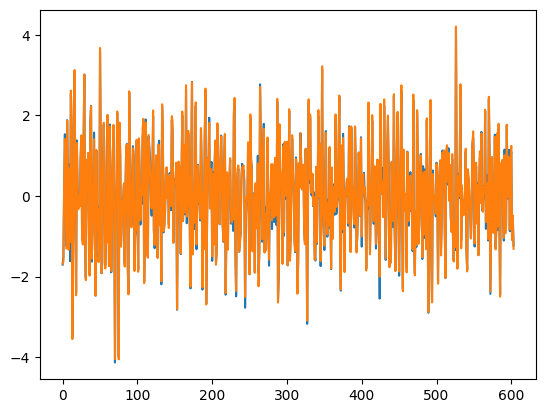

In [50]:
import matplotlib.pyplot as plt
plt.plot(train_results['Actuals'])
plt.plot(train_results['Train Predictions'])

In [51]:
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})
test_results

19/19 [==============================] - 0s 10ms/step


,Test Predictions,Actuals
0,1.054584,2.386520
1,1.229530,-0.352982
2,-0.029637,-1.118607
3,1.044192,0.886374
4,0.709976,0.321725
...,...,...
599,1.187986,1.599362
600,1.862119,3.427292
601,-1.840111,0.022653
602,-2.992234,-4.032767


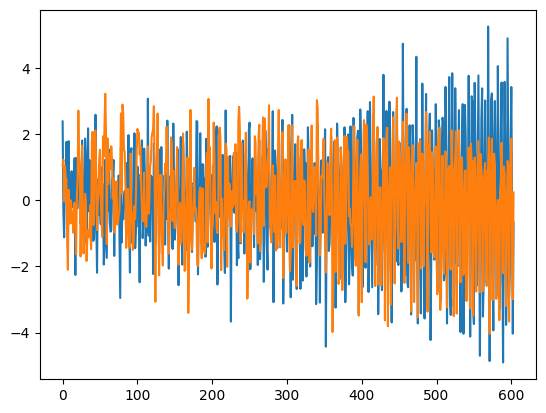

In [52]:
plt.plot(test_results['Actuals'])
plt.plot(test_results['Test Predictions'])